In [2]:
import numpy as np
import pandas as pd
import seaborn as sb 
import matplotlib.pyplot as plt
import sklearn
from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn import svm
from sklearn.metrics import classification_report

/Users/antoinetamagno/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
jack=pd.read_csv("/Users/AntoineTamagno/Documents/titanic_data.csv",index_col=None)
jack.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


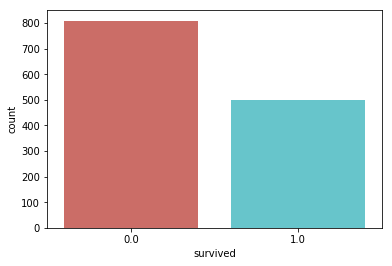

In [4]:
sb.countplot(x='survived', data=jack, palette='hls')

In [5]:
jack.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 14 columns):
pclass       1309 non-null float64
survived     1309 non-null float64
name         1309 non-null object
sex          1309 non-null object
age          1046 non-null float64
sibsp        1309 non-null float64
parch        1309 non-null float64
ticket       1309 non-null object
fare         1308 non-null float64
cabin        295 non-null object
embarked     1307 non-null object
boat         486 non-null object
body         121 non-null float64
home.dest    745 non-null object
dtypes: float64(7), object(7)
memory usage: 143.4+ KB


In [6]:
jack_data = jack.drop(['boat','body','home.dest','sex','name','cabin'], 1)
jack_data.head()

,pclass,survived,age,sibsp,parch,ticket,fare,embarked
0,1.0,1.0,29.0000,0.0,0.0,24160,211.3375,S
1,1.0,1.0,0.9167,1.0,2.0,113781,151.5500,S
2,1.0,0.0,2.0000,1.0,2.0,113781,151.5500,S
3,1.0,0.0,30.0000,1.0,2.0,113781,151.5500,S
4,1.0,0.0,25.0000,1.0,2.0,113781,151.5500,S


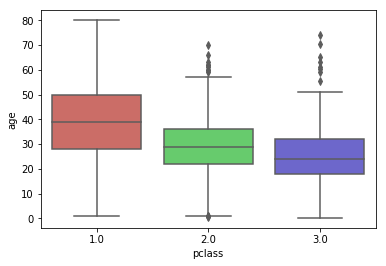

In [7]:
sb.boxplot(x='pclass', y='age', data=jack_data, palette='hls')

In [8]:
jack_data.head()

,pclass,survived,age,sibsp,parch,ticket,fare,embarked
0,1.0,1.0,29.0000,0.0,0.0,24160,211.3375,S
1,1.0,1.0,0.9167,1.0,2.0,113781,151.5500,S
2,1.0,0.0,2.0000,1.0,2.0,113781,151.5500,S
3,1.0,0.0,30.0000,1.0,2.0,113781,151.5500,S
4,1.0,0.0,25.0000,1.0,2.0,113781,151.5500,S


In [9]:
jack_data.dropna(inplace=True)
jack_data.isnull().sum()

pclass      0
survived    0
age         0
sibsp       0
parch       0
ticket      0
fare        0
embarked    0
dtype: int64

In [10]:
location = pd.get_dummies(jack_data['embarked'],drop_first=True)
location.head()

,Q,S
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [11]:
pass_class=pd.get_dummies(jack_data['pclass'],drop_first=True)
pass_class.head()

,2.0,3.0
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [12]:
jack_data.drop(['embarked','ticket'],axis=1,inplace=True)
jack_data.head()

,pclass,survived,age,sibsp,parch,fare
0,1.0,1.0,29.0000,0.0,0.0,211.3375
1,1.0,1.0,0.9167,1.0,2.0,151.5500
2,1.0,0.0,2.0000,1.0,2.0,151.5500
3,1.0,0.0,30.0000,1.0,2.0,151.5500
4,1.0,0.0,25.0000,1.0,2.0,151.5500


In [13]:
jack_dmy=pd.concat([jack_data,location,pass_class],axis=1)
jack_dmy.head()

,pclass,survived,age,sibsp,parch,fare,Q,S,2.0,3.0
0,1.0,1.0,29.0000,0.0,0.0,211.3375,0,1,0,0
1,1.0,1.0,0.9167,1.0,2.0,151.5500,0,1,0,0
2,1.0,0.0,2.0000,1.0,2.0,151.5500,0,1,0,0
3,1.0,0.0,30.0000,1.0,2.0,151.5500,0,1,0,0
4,1.0,0.0,25.0000,1.0,2.0,151.5500,0,1,0,0


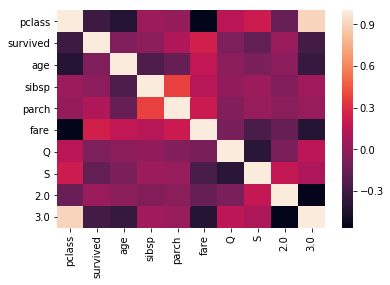

In [14]:
sb.heatmap(jack_dmy.corr())

In [15]:
jack_dmy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1043 entries, 0 to 1308
Data columns (total 10 columns):
pclass      1043 non-null float64
survived    1043 non-null float64
age         1043 non-null float64
sibsp       1043 non-null float64
parch       1043 non-null float64
fare        1043 non-null float64
Q           1043 non-null uint8
S           1043 non-null uint8
2.0         1043 non-null uint8
3.0         1043 non-null uint8
dtypes: float64(6), uint8(4)
memory usage: 61.1 KB


In [16]:
X = jack_dmy.ix[:,(1,2,3,4,5,6)].values
y = jack_dmy.ix[:,0].values

/Users/antoinetamagno/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
/Users/antoinetamagno/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


In [17]:
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=.3, random_state=25)

In [18]:
LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [19]:
y_perd=LogReg.predict(X_test)

In [20]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_perd)
confusion_matrix

array([[ 81,   5,   2],
       [  8,  30,  33],
       [  4,   0, 150]])

In [21]:
print(classification_report(y_test, y_perd))

             precision    recall  f1-score   support

        1.0       0.87      0.92      0.90        88
        2.0       0.86      0.42      0.57        71
        3.0       0.81      0.97      0.88       154

avg / total       0.84      0.83      0.82       313



In [22]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
dtc.score(X_test, y_test)

0.9361022364217252

In [ ]:
from sklearn.svm import SVC
classifier=SVC(kernel='poly',degree=8)
classifier.fit(X_train,y_train)

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred)) 